<a href="https://colab.research.google.com/github/kgovindaraju123/AIML/blob/master/Word2Vec_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction

---
Word embeddings are a modern approach for representing text in natural language processing.

Word embedding algorithms like word2vec and GloVe are key to the state-of-the-art results achieved by neural network models on natural language processing problems like machine translation.


**Word Embeddings**

A word embedding is an approach to provide a dense vector representation of words that capture something about their meaning.

Word embeddings are an improvement over simpler bag-of-word model word encoding schemes like word counts and frequencies that result in large and sparse vectors (mostly 0 values) that describe documents but not the meaning of the words.

Word embeddings work by using an algorithm to train a set of fixed-length dense and continuous-valued vectors based on a large corpus of text. Each word is represented by a point in the embedding space and these points are learned and moved around based on the words that surround the target word.

It is defining a word by the company that it keeps that allows the word embedding to learn something about the meaning of words. The vector space representation of the words provides a projection where words with similar meanings are locally clustered within the space.

The use of word embeddings over other text representations is one of the key methods that has led to breakthrough performance with deep neural networks on problems like machine translation.

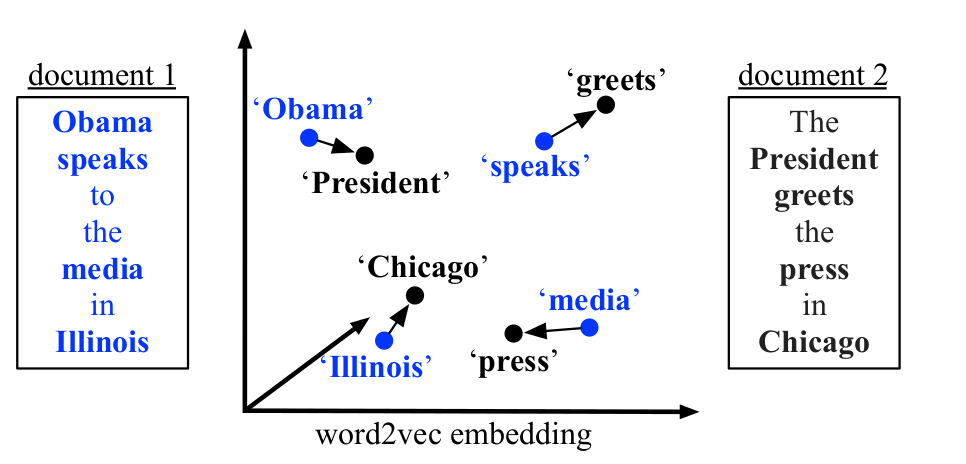

Goal of this Excercise:

---
how to train and load word embedding models for natural language processing applications in Python using Gensim.


Gensim Python Library

Gensim is an open source Python library for natural language processing, with a focus on topic modeling.

It also provides tools for loading pre-trained word embeddings in a few formats and for making use and querying a loaded embedding.

**Develop Word2Vec Embedding**

Word2vec is one algorithm for learning a word embedding from a text corpus.

There are two main training algorithms that can be used to learn the embedding from text; 
they are

1. continuous bag of words (CBOW) and
 
2.  skip grams
 .

We will not get into the algorithms other than to say that they generally look at a window of words for each target word to provide context and in turn meaning for words

Word2vec is one algorithm for learning a word embedding from a text corpus.
There are two main training algorithms that can be used to learn the embedding from text; they are continuous bag of words (CBOW) and skip grams.`
We will not get into the algorithms other than to say that they generally look at a window of words for each target word to provide context and in turn meaning for words

Specifically, each sentence must be tokenized, meaning divided into words and prepared (e.g. perhaps pre-filtered and perhaps converted to a preferred case).

The sentences could be text loaded into memory, or an iterator that progressively loads text, required for very large text corpora.

There are many parameters on this constructor; a few noteworthy arguments you may wish to configure are:

size: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).

window: (default 5) The maximum distance between a target word and words around the target word.

 min_count: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.

workers: (default 3) The number of threads to use while training.

 sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

The defaults are often good enough when just getting started. If you have a lot of cores, as most modern computers do, I strongly encourage you to increase workers to match the number of cores (e.g. 8).

After the model is trained, it is accessible via the “wv” attribute. This is the actual word vector model in which queries can be made.

In [0]:
#Define Word2Vec Model
from gensim.models import Word2Vec

In [3]:
#Define Training Data
sentences = [['Once','Upon','a','Time'],['There','is','a','King'],['King','will','marry','Queen','and','Queen','have','Two','Princes']]
sentences

[['Once', 'Upon', 'a', 'Time'],
 ['There', 'is', 'a', 'King'],
 ['King', 'will', 'marry', 'Queen', 'and', 'Queen', 'have', 'Two', 'Princes']]

In [4]:
#Train Model
model = Word2Vec(sentences,min_count=1)
#summarize the loaded model
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [5]:
#Summarize vocabulory
words = list(model.wv.vocab)
print(words)

['Once', 'Upon', 'a', 'Time', 'There', 'is', 'King', 'will', 'marry', 'Queen', 'and', 'have', 'Two', 'Princes']


In [6]:
#Access vector for one word
print(model['King'])

[ 5.2591437e-04  3.8060823e-03 -1.5842181e-03  3.7932685e-03
 -4.2543341e-03 -1.1554547e-03 -5.3953129e-04  3.0434805e-03
 -4.9610203e-03 -9.2932378e-04  2.5406308e-03 -3.8669095e-03
 -1.8521622e-03  4.1045129e-04 -4.2606518e-03  1.7108411e-03
  1.9560717e-03  2.4176987e-03 -1.2441169e-03 -2.0665389e-03
 -8.1065060e-05  3.3216157e-03  1.5199420e-03 -3.3532162e-03
  1.2463684e-03 -1.2162516e-03 -2.9468026e-03 -1.8912002e-03
 -3.0386997e-03 -4.2012343e-03 -2.1057255e-03  1.1057019e-03
  3.9480338e-03 -6.4844656e-04  1.4979834e-03 -4.2579183e-03
  4.1720308e-03  2.9016307e-03 -4.2848950e-03 -4.4008279e-03
 -3.2735788e-03  1.9959924e-03  3.8685412e-03  3.2155688e-03
  6.6604745e-04 -3.4126921e-03  3.7077568e-03 -2.0513367e-03
 -9.8186859e-04  1.8114042e-03 -4.0143514e-03 -1.4352391e-03
 -2.0790584e-03  1.4812039e-03 -1.4081768e-03 -4.9030236e-03
 -4.8511769e-03  3.3530027e-03  3.8812000e-03 -9.5219773e-05
  4.2881365e-03 -2.0203283e-03 -6.7951926e-04  1.2990888e-03
 -2.9071008e-03  3.16013

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [7]:
#Save Model
model.save('model.bin')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [8]:
#load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Visualize Word Embedding

---
After you learn word embedding for your text data, it can be nice to explore it with visualization.

You can use classical projection methods to reduce the high-dimensional word vectors to two-dimensional plots and plot them on a graph.

The visualizations can provide a qualitative diagnostic for your learned model.

We can retrieve all of the vectors from a trained model as follows:


In [9]:
X = model[model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


Plot Word Vectors Using PCA

We can create a 2-dimensional PCA model of the word vectors using the scikit-learn PCA class as follows.

In [0]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
result = pca.fit_transform(X)

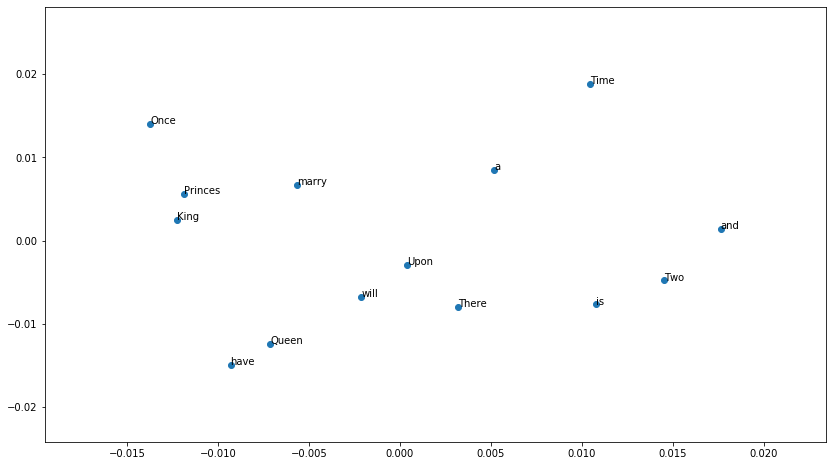

In [11]:
#Create a Scatter plot of the Projection
plt.figure(figsize=(14,8))
plt.scatter(result[:,0],result[:,1])
words = list(model.wv.vocab)
for i,word in enumerate(words):
  plt.annotate(word,xy=(result[i,0],result[i,1]))
plt.show()
